In [6]:
import time
def lassoUseCd(X, y, lambdas=0.1, max_iter=1000, tol=1e-4):
    """
    Lasso（coordinate descent）
    args:
        X - training set
        y - labels
        lambdas - penalty
        max_iter - 
        tol - 
    return:
        W - Weights
    """
    # initialization W is zero vector
    W = np.zeros(X.shape[1])
    for it in range(max_iter):
        done = True
        # for loop for all variables
        for i in range(0, len(W)):
            # records last variable
            w = W[i]
            W[i] = down(X, y, W, i, lambdas)
            if (np.abs(w - W[i]) > tol):
                done = False

        if (done):
            break
    return W

def down(X, y, W, index, lambdas=0.1):
    """
    cost(W) = (x1 * w1 + x2 * w2 + ... - y)^2 / 2n + ... + λ(|w1| + |w2| + ...)
    since other variables fixed:
    cost(w1) = (a * w1 + b)^2 / 2n + ... + λ|w1| + c
    expand:
    cost(w1) = aa / 2n * w1^2 + (ab / n) * w1 + λ|w1| + c (aa,ab,c,λ are constant)
    """
    aa = 0
    ab = 0
    for i in range(X.shape[0]):
        a = X[i][index]
        b = X[i][:].dot(W) - a * W[index] - y[i]
        aa = aa + a * a
        ab = ab + a * b
    return det(aa, ab, X.shape[0], lambdas)

def det(aa, ab, n, lambdas=0.1):
    """
    
    det(w) = (aa / n) * w + ab / n + λ = 0 (w > 0)
    => w = - (ab / n + λ) / (aa / n)
    
    det(w) = (aa / n) * w + ab / n - λ = 0 (w < 0)
    => w = - (ab / n - λ) / (aa / n)
    
    det(w) = NaN (w = 0)
    => w = 0
    """
    w = - (ab / n + lambdas) / (aa / n)
    if w < 0:
        w = - (ab / n - lambdas) / (aa / n)
        if w > 0:
            w = 0
    return w

<IPython.core.display.Javascript object>


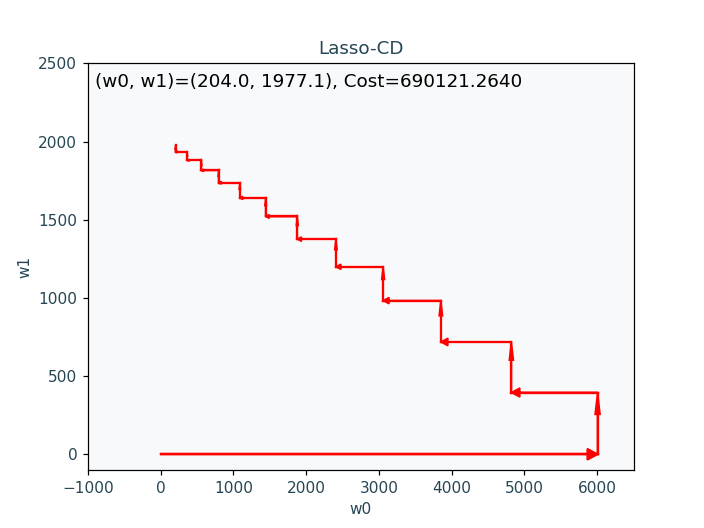

In [2]:
import numpy as np

start = 0

end = 6
X = np.array([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5]])
y = np.array([1598, 3898, 6220, 7799, 10510])


import matplotlib.pyplot as plt
import matplotlib.animation as animation


def calcCost(X, y, W, lambdas = 0.1):
    return np.sum(np.square(X.dot(W) - y)) + lambdas * np.linalg.norm(x=W, ord=1)


def lassoUseCdWithWs(X, y, lambdas=0.1, max_iter=1000, tol=1e-4):
    Ws = []
    W = np.zeros(X.shape[1])
    for it in range(max_iter):
        done = True
        for i in range(0, len(W)):
            Ws.append(np.array(W))
            w = W[i]
            W[i] = down(X, y, W, i, lambdas)
            if (np.abs(w - W[i]) > tol):
                done = False
        if (done):
            Ws.append(np.array(W))
            break
    return Ws

%matplotlib notebook

fig, ax = plt.subplots()

Ws = lassoUseCdWithWs(X, y, tol=1e-1)
text = plt.text(-900, 2350, '', fontsize=12)

def update(i):
    start = Ws[i]
    end = Ws[i + 1]
    x1 = np.linspace(start[0], end[0], 100)
    y1 = np.linspace(start[1], end[1], 100)
    head_width = (end[0] + 1000) / 100
    plt.arrow(
        start[0], 
        start[1], 
        end[0] - start[0], 
        end[1] - start[1], 
        head_width=head_width, 
        head_length=head_width * 2,
        fc='r',
        ec='r',
        length_includes_head = True)
    ax.set_xlim(-1000, 6500)
    ax.set_ylim(-100, 2500)
    line, = ax.plot(x1, y1, 'r')
    text.set_text("(w0, w1)=(%.1f, %.1f), Cost=%.4f"%(end[0], end[1], calcCost(X, y, end)))
    return line

ani = animation.FuncAnimation(fig, update, frames = range(len(Ws)), interval=100, blit=True, repeat=False)
ax.set_facecolor('#f8f9fa')
ax.set_xlim(-1000, 6500)
ax.set_ylim(-100, 2500)
ax.set_title('Lasso-CD', color='#264653')
ax.set_xlabel('w0', color='#264653')
ax.set_ylabel('w1', color='#264653')
ax.tick_params(labelcolor='#264653')
plt.show()

C:\Users\Yicen\AppData\Local\Temp\ipykernel_3420\1128603422.py:99: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sx = np.linalg.lstsq(sa, sb)
C:\Users\Yicen\AppData\Local\Temp\ipykernel_3420\1128603422.py:109: RuntimeWarning: divide by zero encountered in true_divide
  gamma_hat = -W / d_hat
C:\Users\Yicen\AppData\Local\Temp\ipykernel_3420\1128603422.py:109: RuntimeWarning: invalid value encountered in true_divide
  gamma_hat = -W / d_hat


<IPython.core.display.Javascript object>


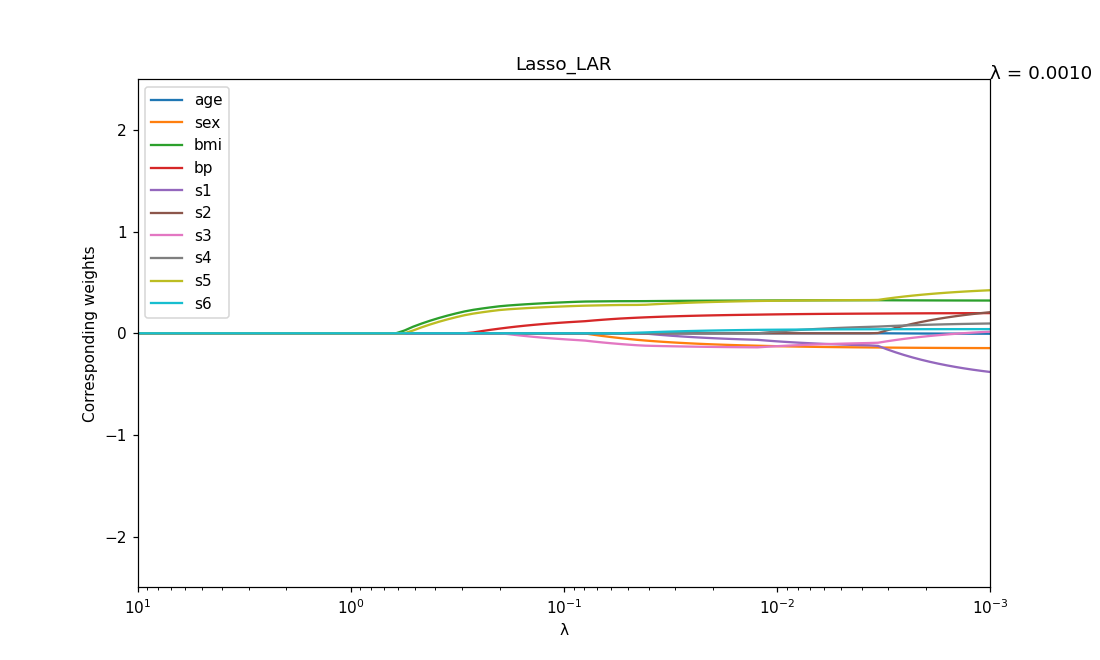

In [3]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets

from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target


X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(-1, 1)).reshape(-1)


%matplotlib notebook


def lassoUseLars(X, y, lambdas=1, max_iter=1000):
    """
    Lasso Least Angle Regression
    Formula refer to:https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf
    args:
        X - Traning data
        y - Target
        lambdas - penalty
        max_iter - 
    return:
        W - 
    """
    n, m = X.shape
    # Subscripts of selected features:
    active_set = set()
    # Current vector for prediction
    cur_pred = np.zeros((n,), dtype=np.float32)
    # residual vector
    residual = y - cur_pred
    
    # The dot product of the feature vector and the residual vector, that is, the correlation:
    cur_corr = X.T.dot(residual)
    
    # Select the subscript with the highest correlation:
    j = np.argmax(np.abs(cur_corr), 0)
    
    # Add subscripts to the set of selected feature subscripts:
    active_set.add(j)
    
    # Initialize weight coefficients
    W = np.zeros((m,), dtype=np.float32)
    # Record the last weight coefficient
    prev_W = np.zeros((m,), dtype=np.float32)
    # record feature update direction
    sign = np.zeros((m,), dtype=np.int32)
    sign[j] = 1
    
    # average correlation
    lambda_hat = None
    # record last average correlation
    prev_lambda_hat = None
    
    for it in range(max_iter):
        # Compute the residual vector:
        residual = y - cur_pred
        
        # Dot product of eigenvectors and residual vectors:
        cur_corr = X.T.dot(residual)
        # current max correlation:
        largest_abs_correlation = np.abs(cur_corr).max()
        # Compute the current average correlation:
        lambda_hat = largest_abs_correlation / n
        
        # Refer to  sk-learn library:  https://github.com/scikit-learn/scikit-learn/blob/2beed55847ee70d363bdbfe14ee4401438fba057/sklearn/linear_model/_least_angle.py#L542
        if lambda_hat <= lambdas:
            if (it > 0 and lambda_hat != lambdas):
                ss = ((prev_lambda_hat - lambdas) / (prev_lambda_hat - lambda_hat))
                # recalculate the weight coefficients:
                W[:] = prev_W + ss * (W - prev_W)
            break
        # update last average correlation
        prev_lambda_hat = lambda_hat
        
        # End iteration when all features are selected
        if len(active_set) > m:
            break
        
       # Selected feature vectors
    
        X_a = X[:, list(active_set)]
        # The calculation formula of X_a  in the stanford paper - (2.4)
        X_a *= sign[list(active_set)]
       
      # Calculation formula of G_a in the stanford paper - (2.5)
        G_a = X_a.T.dot(X_a)
        G_a_inv = np.linalg.inv(G_a)
        G_a_inv_red_cols = np.sum(G_a_inv, 1)     
        
        # The calculation formula of A_a in the paper - (2.5)
        A_a = 1 / np.sqrt(np.sum(G_a_inv_red_cols))
        
       # Calculation formula of ω in the paper - (2.6)
        omega = A_a * G_a_inv_red_cols
        
        # The calculation formula of the  equiangular in the paper - (2.6)
        equiangular = X_a.dot(omega)
       
       # The calculation formula of a in the paper - (2.11)
        cos_angle = X.T.dot(equiangular)
       
      # gamma in the paper
        gamma = None
        
       # next selected feature subscript
        next_j = None
        
       # The direction of the next feature
        next_sign = 0
        for j in range(m):
            if j in active_set:
                continue
            # The calculation method of γ in the paper - (2.13)
            v0 = (largest_abs_correlation - cur_corr[j]) / (A_a - cos_angle[j]).item()
            v1 = (largest_abs_correlation + cur_corr[j]) / (A_a + cos_angle[j]).item()
            if v0 > 0 and (gamma is None or v0 < gamma):
                gamma = v0
                next_j = j
                next_sign = 1
            if v1 > 0 and (gamma is None or v1 < gamma):
                gamma = v1
                next_j = j
                next_sign = -1
        if gamma is None:
            # The calculation method of γ in the paper - (2.21)
            gamma = largest_abs_correlation / A_a
        
       # Selected feature vectors
        sa = X_a
        
       # angle bisector vector
        sb = equiangular * gamma
        
        # Solve the linear equation (sa * sx = sb)
        sx = np.linalg.lstsq(sa, sb)
        
      # Record the last weight coefficient
        prev_W = W.copy()
        d_hat = np.zeros((m,), dtype=np.int32)
        for i, j in enumerate(active_set):
            # update the current weight coefficient
            W[j] += sx[0][i] * sign[j]
           
        # The calculation method of d_hat in the paper - (3.3)
            d_hat[j] = omega[i] * sign[j]
            
       # The calculation method of γ_j in the paper - (3.4)
        gamma_hat = -W / d_hat
        
      # The calculation method of γ_hat in the paper - (3.5)
        gamma_hat_min = float("+inf")
       
    # The subscript of γ_hat in the paper
        gamma_hat_min_idx = None
        for i, j in enumerate(gamma_hat):
            if j <= 0:
                continue
            if gamma_hat_min > j:
                gamma_hat_min = j
                gamma_hat_min_idx = i
        if gamma_hat_min < gamma:
            
            # update the current prediction vector - (3.6)
            cur_pred = cur_pred + gamma_hat_min * equiangular
           
        # Remove subscripts to the selected feature subscript collection
            active_set.remove(gamma_hat_min_idx)
           
            sign[gamma_hat_min_idx] = 0
        else:
            # update feature update direction set
            cur_pred = X.dot(W)
            
            # Add subscripts to the set of selected feature subscripts
            active_set.add(next_j)
            
            # update feature update direction set
            sign[next_j] = next_sign
            
    return W


n_alphas = 100
alphas = np.logspace(-3, 1, n_alphas)

coefs = []
for a in alphas:
    coefs.append(lassoUseLars(X, y, lambdas=a))

fig, ax = plt.subplots(figsize=(10, 6))  # Increase the figure size
xdatas, ydatas = [], []
lns = []
text = plt.text(0.001, 2.5, '', fontsize=12)
for i in range(0, X.shape[1]):
    xdatas.append([])
    ydatas.append([])
    ln, = ax.plot([], [], label=diabetes.feature_names[i])  # Add label for the legend
    lns.append(ln)

def init():
    ax.set_xlim(alphas[0] , alphas[len(alphas) - 1])
    ax.set_ylim(-2.5, 2.5)
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])
    return lns

def update(i):
    for j in range(0, X.shape[1]):
        xdatas[j].append(alphas[i])
        ydatas[j].append(coefs[i][j])
        lns[j].set_data(xdatas[j], ydatas[j])
    text.set_text("λ = %.4f"%(alphas[i]))
    return lns

ani = animation.FuncAnimation(fig, update, frames = range(len(alphas) - 1, -1, -1), init_func=init, interval=50, blit=True, repeat=False)
plt.title('Lasso_LAR')
plt.xlabel('λ')
plt.ylabel('Corresponding weights')
ax.legend(loc='upper left')  # Add the legend
plt.axis('tight')
plt.show()

C:\Users\Yicen\AppData\Local\Temp\ipykernel_3420\1128603422.py:99: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sx = np.linalg.lstsq(sa, sb)
C:\Users\Yicen\AppData\Local\Temp\ipykernel_3420\1128603422.py:109: RuntimeWarning: divide by zero encountered in true_divide
  gamma_hat = -W / d_hat
C:\Users\Yicen\AppData\Local\Temp\ipykernel_3420\1128603422.py:109: RuntimeWarning: invalid value encountered in true_divide
  gamma_hat = -W / d_hat


<IPython.core.display.Javascript object>


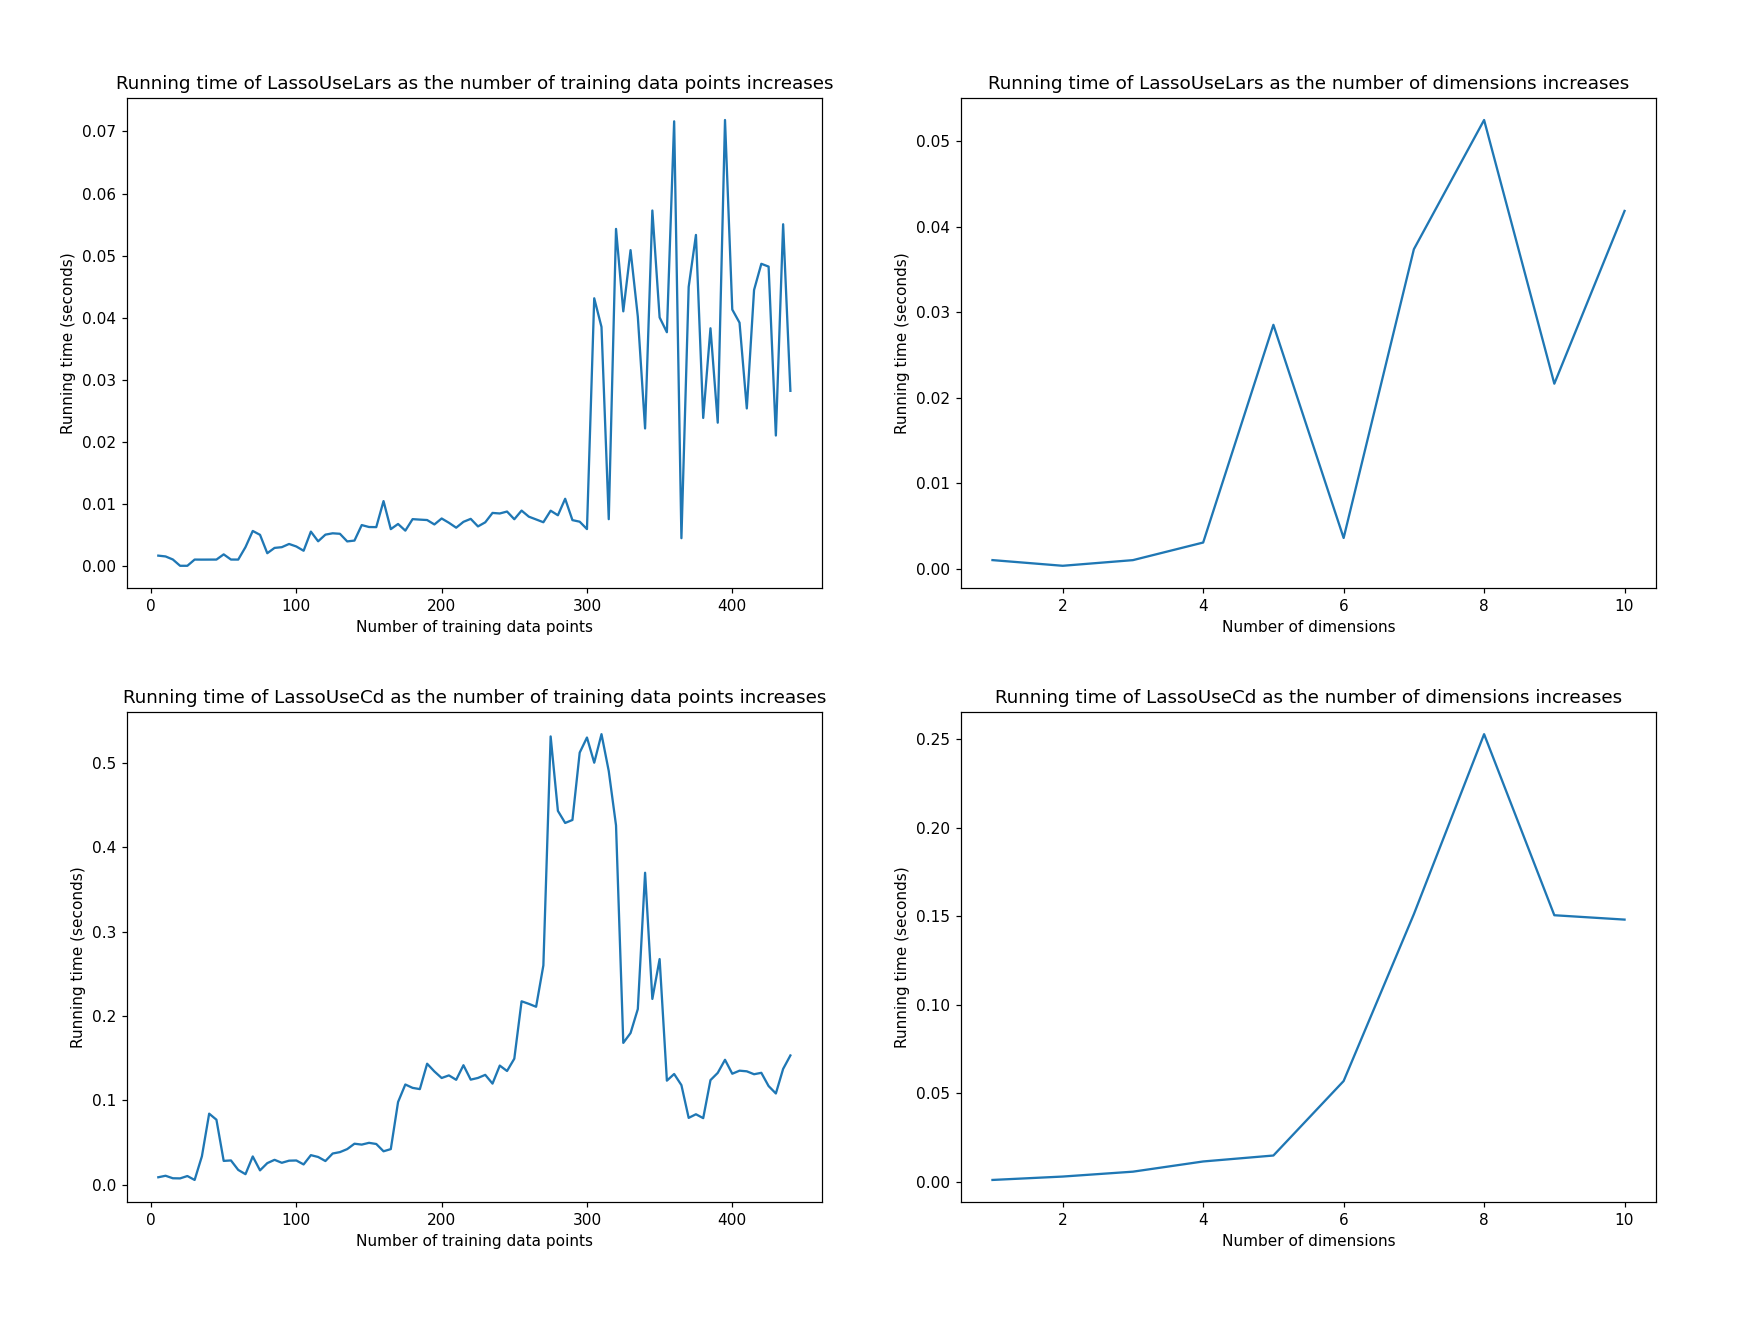

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Set the lambda value for both LassoUseLars and LassoUseCd
lambda_value = 0.01

# Set the number of data points for each step
step_size = 5

# Initialize lists to store the number of data points and the corresponding running times
num_data_points = []
running_times = []
num_data_points_cd = []
running_times_cd = []

# Loop through the dataset with step_size increments and measure the running time of lassoUseLars and lassoUseCd
for i in range(step_size, len(X) + 1, step_size):
    X_train = X[:i]
    y_train = y[:i]
    
    start_time = time.time()
    coef = lassoUseLars(X_train, y_train, lambdas=lambda_value)
    end_time = time.time()
    
    num_data_points.append(i)
    running_times.append(end_time - start_time)
    
    start_time_cd = time.time()
    coef_cd = lassoUseCd(X_train, y_train, lambdas=lambda_value)
    end_time_cd = time.time()
    
    num_data_points_cd.append(i)
    running_times_cd.append(end_time_cd - start_time_cd)

# Initialize lists to store the number of dimensions and the corresponding running times
num_dimensions_lars = []
running_times_lars = []
num_dimensions_cd = []
running_times_cd_dimensions = []

# Loop through the dataset, adding one dimension (column) at a time, and measure the running time of lassoUseLars and lassoUseCd
for i in range(1, X.shape[1] + 1):
    X_train_lars = X[:, :i]
    X_train_cd = X[:, :i]
    
    start_time_lars = time.time()
    coef_lars = lassoUseLars(X_train_lars, y, lambdas=lambda_value)
    end_time_lars = time.time()
    
    num_dimensions_lars.append(i)
    running_times_lars.append(end_time_lars - start_time_lars)
    
    start_time_cd = time.time()
    coef_cd = lassoUseCd(X_train_cd, y, lambdas=lambda_value)
    end_time_cd = time.time()
    
    num_dimensions_cd.append(i)
    running_times_cd_dimensions.append(end_time_cd - start_time_cd)

# Create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.tight_layout(pad=6.0)

# Plot 1: Running time of LassoUseLars as the number of training data points increases
axes[0, 0].plot(num_data_points, running_times)
axes[0, 0].set_xlabel("Number of training data points")
axes[0, 0].set_ylabel("Running time (seconds)")
axes[0, 0].set_title("Running time of LassoUseLars as the number of training data points increases")

# Plot 2: Running time of LassoUseLars as the number of dimensions increases
axes[0, 1].plot(num_dimensions_lars, running_times_lars)
axes[0, 1].set_xlabel("Number of dimensions")
axes[0, 1].set_ylabel("Running time (seconds)")
axes[0, 1].set_title("Running time of LassoUseLars as the number of dimensions increases")

# Plot 3: Running time of LassoUseCd as the number of training data points
axes[1, 0].plot(num_data_points_cd, running_times_cd)
axes[1, 0].set_xlabel("Number of training data points")
axes[1, 0].set_ylabel("Running time (seconds)")
axes[1, 0].set_title("Running time of LassoUseCd as the number of training data points increases")

# Plot 4: Running time of LassoUseCd as the number of dimensions increases
axes[1, 1].plot(num_dimensions_cd, running_times_cd_dimensions)
axes[1, 1].set_xlabel("Number of dimensions")
axes[1, 1].set_ylabel("Running time (seconds)")
axes[1, 1].set_title("Running time of LassoUseCd as the number of dimensions increases")

# Show the plot
plt.show()
plt.savefig('lasso_timescale_d.png', dpi=500, bbox_inches='tight')

C:\Users\Yicen\AppData\Local\Temp\ipykernel_3420\1128603422.py:99: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sx = np.linalg.lstsq(sa, sb)
C:\Users\Yicen\AppData\Local\Temp\ipykernel_3420\1128603422.py:109: RuntimeWarning: divide by zero encountered in true_divide
  gamma_hat = -W / d_hat
C:\Users\Yicen\AppData\Local\Temp\ipykernel_3420\1128603422.py:109: RuntimeWarning: invalid value encountered in true_divide
  gamma_hat = -W / d_hat


<IPython.core.display.Javascript object>


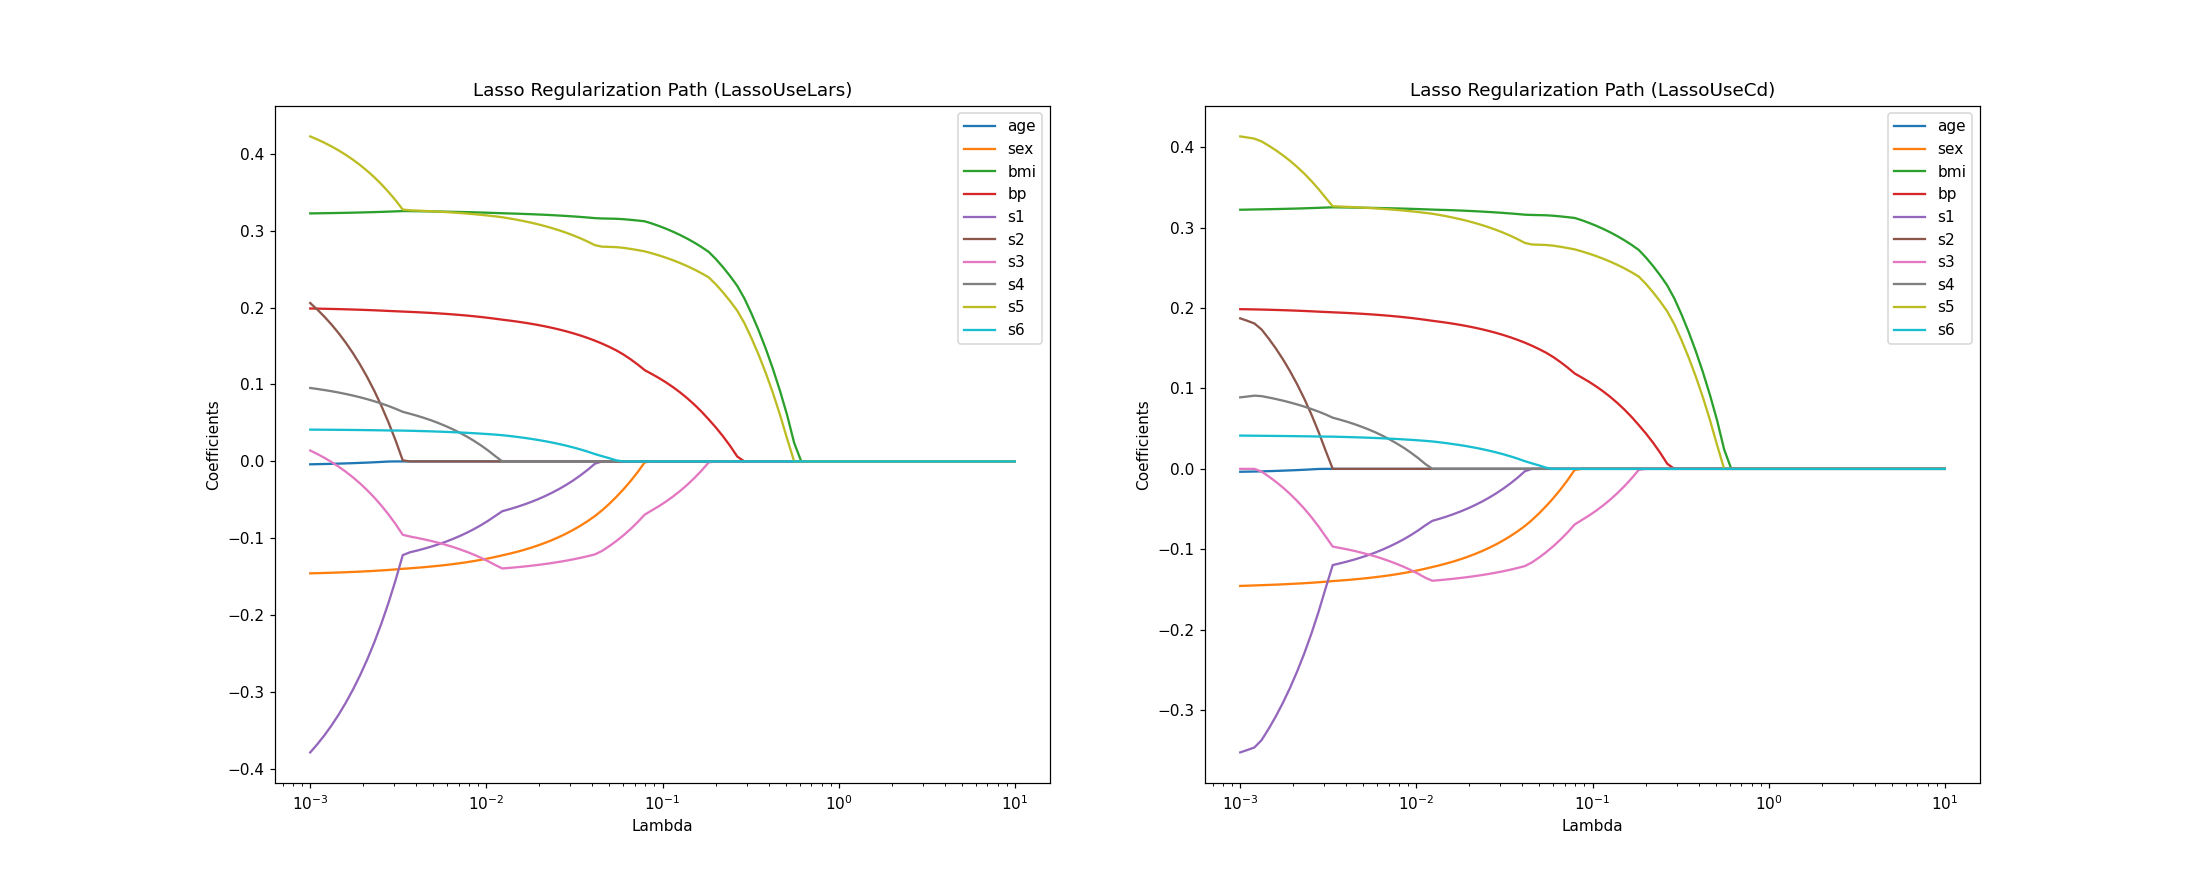

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Lasso regularization path
n_alphas = 100
alphas = np.logspace(-3, 1, n_alphas)

coefs_lars = []
for a in alphas:
    coefs_lars.append(lassoUseLars(X_train, y_train, lambdas=a))

coefs_lars = np.array(coefs_lars)

coefs_cd = []
for a in alphas:
    coefs_cd.append(lassoUseCd(X_train, y_train, lambdas=a))

coefs_cd = np.array(coefs_cd)

# Get feature names from the dataset
feature_names = diabetes.feature_names

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot the regularization path for LassoUseLars
for i in range(coefs_lars.shape[1]):
    ax1.plot(alphas, coefs_lars[:, i], label=feature_names[i])

ax1.set_xscale('log')
ax1.set_xlabel('Lambda')
ax1.set_ylabel('Coefficients')
ax1.set_title('Lasso Regularization Path (LassoUseLars)')
ax1.legend()

# Plot the regularization path for LassoUseCd
for i in range(coefs_cd.shape[1]):
    ax2.plot(alphas, coefs_cd[:, i], label=feature_names[i])

ax2.set_xscale('log')
ax2.set_xlabel('Lambda')
ax2.set_ylabel('Coefficients')
ax2.set_title('Lasso Regularization Path (LassoUseCd)')
ax2.legend()

plt.show()
plt.savefig('lasso_regularization_paths_d.png', dpi=500, bbox_inches='tight')

Fitting the Lasso model using LARS took 0.01 seconds.


C:\Users\Yicen\AppData\Local\Temp\ipykernel_3420\1128603422.py:99: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sx = np.linalg.lstsq(sa, sb)
C:\Users\Yicen\AppData\Local\Temp\ipykernel_3420\1128603422.py:109: RuntimeWarning: divide by zero encountered in true_divide
  gamma_hat = -W / d_hat
C:\Users\Yicen\AppData\Local\Temp\ipykernel_3420\1128603422.py:109: RuntimeWarning: invalid value encountered in true_divide
  gamma_hat = -W / d_hat


<IPython.core.display.Javascript object>


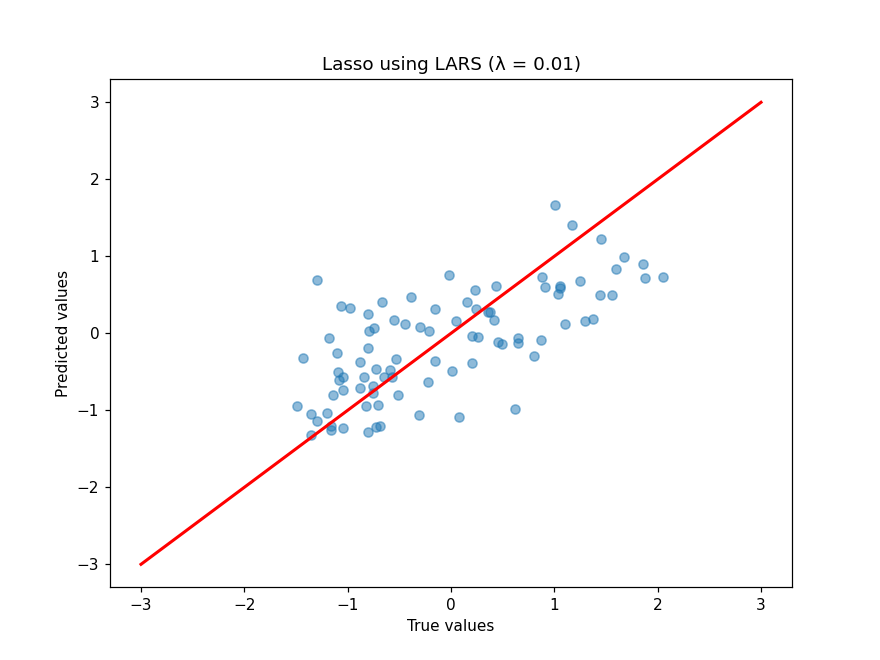

In [9]:
# Set the lambda value
lambda_value = 0.01

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Lasso model using LARS
start_time = time.time()
coef = lassoUseLars(X_train, y_train, lambdas=lambda_value)
end_time = time.time()
print(f"Fitting the Lasso model using LARS took {end_time - start_time:.2f} seconds.")
# Make predictions on the test set
y_pred = X_test.dot(coef)

# Create a scatter plot comparing the true values with the predicted values
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, y_pred, alpha=0.5)
ax.plot([-3, 3], [-3, 3], color='red', linewidth=2)  # Add a diagonal line representing a perfect fit

ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")
ax.set_title(f"Lasso using LARS (λ = {lambda_value})")

plt.show()

Fitting the Lasso model using CD took 0.16 seconds.


<IPython.core.display.Javascript object>


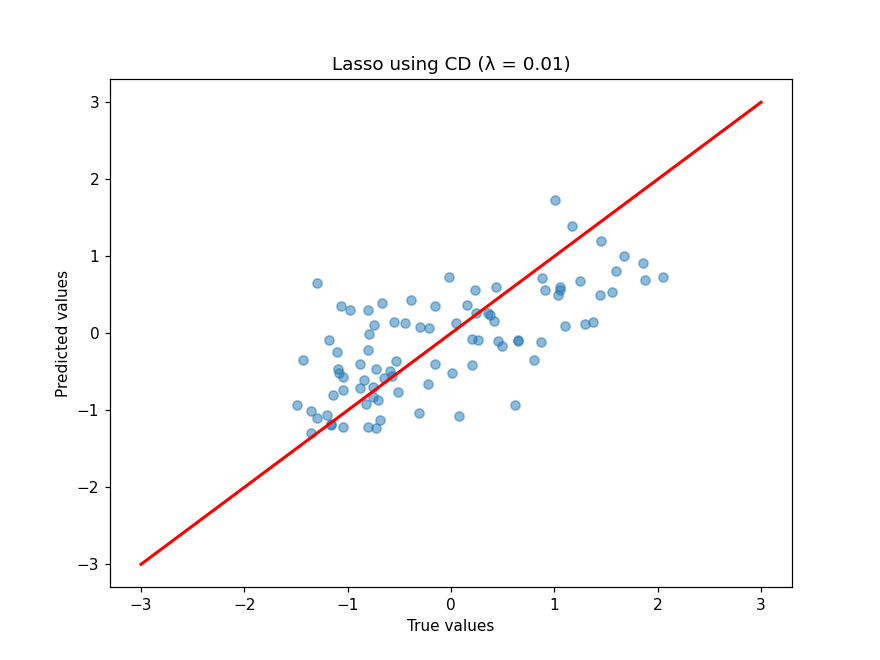

In [10]:
lambda_value = 0.01

# Split the data into training and testing sets
# Fit the Lasso model using LARS
start_time = time.time()
coef = lassoUseCd(X_train, y_train, lambdas=lambda_value)
end_time = time.time()
print(f"Fitting the Lasso model using CD took {end_time - start_time:.2f} seconds.")
# Make predictions on the test set
y_pred = X_test.dot(coef)
# Create a scatter plot comparing the true values with the predicted values
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, y_pred, alpha=0.5)
ax.plot([-3, 3], [-3, 3], color='red', linewidth=2)  # Add a diagonal line representing a perfect fit

ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")
ax.set_title(f"Lasso using CD (λ = {lambda_value})")

plt.show()

In [11]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from functools import partial
from sklearn import datasets
# Load and preprocess the dataset
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(-1, 1)).reshape(-1)

# Split the dataset into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Define the range of lambda values for cross-validation
lambdas = np.logspace(-3, 1, 20)

# Initialize lists to store the validation MSE for all methods
mse_val_cd = []
mse_val_lars = []
mse_val_builtin = []

# Cross-validation loop
for lambda_ in lambdas:
    lasso_cd = partial(lassoUseCd, lambdas=lambda_)
    lasso_lars = partial(lassoUseLars, lambdas=lambda_)

    coef_cd = lasso_cd(X_train, y_train)
    coef_lars = lasso_lars(X_train, y_train)

    y_val_pred_cd = X_val.dot(coef_cd)
    y_val_pred_lars = X_val.dot(coef_lars)

    mse_val_cd.append(mean_squared_error(y_val, y_val_pred_cd))
    mse_val_lars.append(mean_squared_error(y_val, y_val_pred_lars))

    # Built-in Lasso function
    lasso_builtin = Lasso(alpha=lambda_, max_iter=1000, tol=1e-4)
    lasso_builtin.fit(X_train, y_train)
    y_val_pred_builtin = lasso_builtin.predict(X_val)
    mse_val_builtin.append(mean_squared_error(y_val, y_val_pred_builtin))

# Determine the best lambda for all methods
best_lambda_cd = lambdas[np.argmin(mse_val_cd)]
best_lambda_lars = lambdas[np.argmin(mse_val_lars)]
best_lambda_builtin = lambdas[np.argmin(mse_val_builtin)]

# Train the models using the best lambda values
coef_cd_best = lassoUseCd(X_train, y_train, lambdas=best_lambda_cd)
coef_lars_best = lassoUseLars(X_train, y_train, lambdas=best_lambda_lars)

# Evaluate the models on the test set
y_test_pred_cd = X_test.dot(coef_cd_best)
y_test_pred_lars = X_test.dot(coef_lars_best)

test_mse_cd = mean_squared_error(y_test, y_test_pred_cd)
test_mse_lars = mean_squared_error(y_test, y_test_pred_lars)

# Built-in Lasso function
lasso_builtin = Lasso(alpha=best_lambda_builtin, max_iter=1000, tol=1e-4)
lasso_builtin.fit(X_train, y_train)
y_test_pred_builtin = lasso_builtin.predict(X_test)
test_mse_builtin = mean_squared_error(y_test, y_test_pred_builtin)

print("Best lambda for LassoUseCd:", best_lambda_cd)
print("Best lambda for LassoUseLars:", best_lambda_lars)
print("Best lambda for Bulit-in:", best_lambda_builtin)
print("Test MSE for LassoUseCd:", test_mse_cd)
print("Test MSE for LassoUseLars:", test_mse_lars)
print("Test MSE for Bulit-in:", test_mse_builtin)

C:\Users\Yicen\AppData\Local\Temp\ipykernel_3420\1128603422.py:99: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sx = np.linalg.lstsq(sa, sb)
C:\Users\Yicen\AppData\Local\Temp\ipykernel_3420\1128603422.py:109: RuntimeWarning: divide by zero encountered in true_divide
  gamma_hat = -W / d_hat
C:\Users\Yicen\AppData\Local\Temp\ipykernel_3420\1128603422.py:109: RuntimeWarning: invalid value encountered in true_divide
  gamma_hat = -W / d_hat
C:\Users\Yicen\AppData\Local\Temp\ipykernel_3420\1128603422.py:99: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old

Best lambda for LassoUseCd: 0.001
Best lambda for LassoUseLars: 0.018329807108324356
Best lambda for Bulit-in: 0.029763514416313176
Test MSE for LassoUseCd: 0.4826483776279664
Test MSE for LassoUseLars: 0.4675944081083764
Test MSE for Bulit-in: 0.4722304803081988


C:\Users\Yicen\AppData\Local\Temp\ipykernel_3420\1128603422.py:99: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sx = np.linalg.lstsq(sa, sb)
C:\Users\Yicen\AppData\Local\Temp\ipykernel_3420\1128603422.py:109: RuntimeWarning: divide by zero encountered in true_divide
  gamma_hat = -W / d_hat
C:\Users\Yicen\AppData\Local\Temp\ipykernel_3420\1128603422.py:109: RuntimeWarning: invalid value encountered in true_divide
  gamma_hat = -W / d_hat


Coefficients for LassoUseCd: [ 0.01487048 -0.14804406  0.33109558  0.19733026 -0.45726584  0.1963182
  0.06660248  0.17554349  0.42998275  0.04242228]
Coefficients for LassoUseLars: [ 0.         -0.11478417  0.33119473  0.18124849 -0.33057407  0.1852598
 -0.02772048  0.03600999  0.41444826  0.03092266]
Coefficients for built-in Lasso: [ 0.         -0.09644906  0.3344419   0.16707272 -0.0790579  -0.
 -0.12886439  0.          0.31487363  0.03053674]


<IPython.core.display.Javascript object>


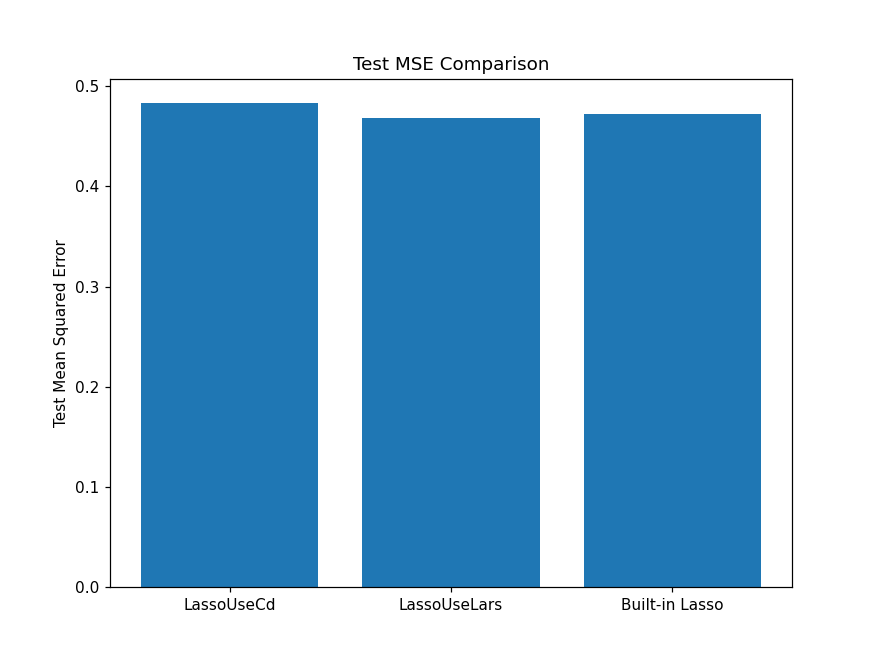

<IPython.core.display.Javascript object>


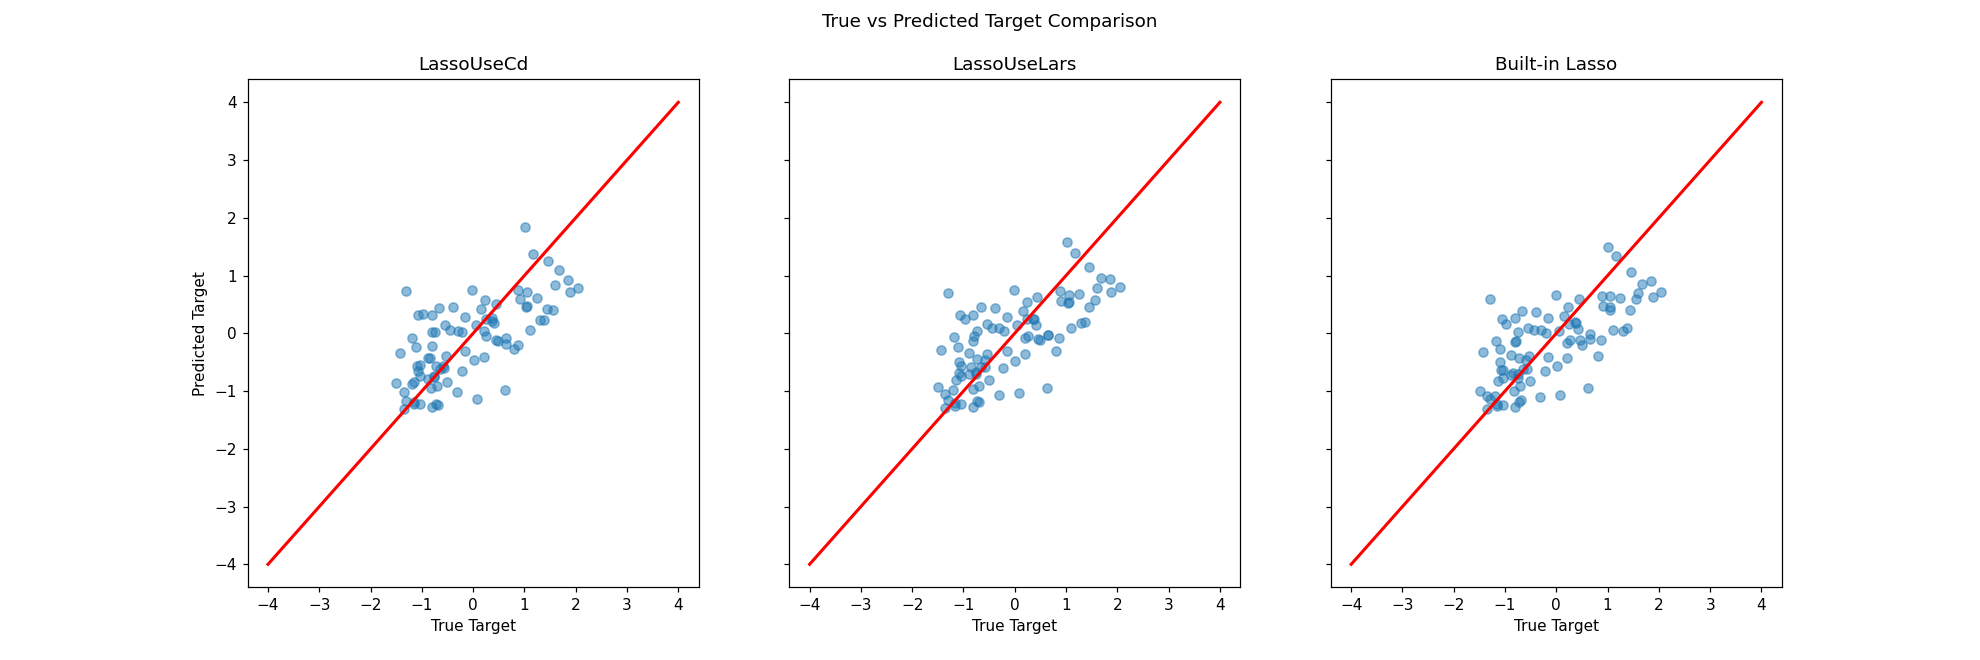

In [12]:
print("Coefficients for LassoUseCd:", coef_cd_best)
print("Coefficients for LassoUseLars:", coef_lars_best)
print("Coefficients for built-in Lasso:", lasso_builtin.coef_)

# Bar plot to compare test MSE
methods = ['LassoUseCd', 'LassoUseLars', 'Built-in Lasso']
mse_values = [test_mse_cd, test_mse_lars, test_mse_builtin]

plt.figure(figsize=(8, 6))
plt.bar(methods, mse_values)
plt.ylabel('Test Mean Squared Error')
plt.title('Test MSE Comparison')
plt.show()

# Scatter plot to compare true vs predicted target values
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

predictions = [y_test_pred_cd, y_test_pred_lars, y_test_pred_builtin]

for i, ax in enumerate(axes):
    ax.scatter(y_test, predictions[i], alpha=0.5)
    ax.plot([-4, 4], [-4, 4], 'r', lw=2)
    ax.set_title(methods[i])
    ax.set_xlabel('True Target')
    if i == 0:
        ax.set_ylabel('Predicted Target')

plt.suptitle('True vs Predicted Target Comparison')
plt.show()